## Ejericicio: Cálculo de distancia entre dos puntos geográficos

>> 1. Calcular la distancia entre los dos puntos de coordenadas geográficas en grados sexagesimales decimales:
$d(AB)^2 = (x_2 - x_1)^2 + (y_2 - y_1)^2$
>> 2. Escribir los resultados en [cm], [m] y [km]
>> 3. Calcular el tiempo que tarda un peatón y automóvil que viajan a una velocidad $2[\frac{km}{h}]$ y $60[\frac{km}{h}]$, respectivamente, en recorrer la distacia $d(AB)$

Las coordendas geográficas del punto A corresponden a la Torre BBVA Bancomer. El punto B es el Edificio de Sismología de Exploración del Instituto Mexicano del Petróleo (Fig. 1).

* **A(Lat/Lon)**: 19.4228°,-99.1749°

* **B(Lat/Lon)**: 19.4893°,-99.1478°

### Solución

La forma más sencilla de calcular la distancia entre dos puntos en coordenadas geográficas es convertir las ubicaciones a coordendas a `UTM` ([Universal Transversal de Mercator](https://es.wikipedia.org/wiki/Sistema_de_coordenadas_universal_transversal_de_Mercator)) con base en el geoide [WGS-84](https://es.wikipedia.org/wiki/WGS84). Para esto, ocupamos la biblioteca de `Python` [utm](https://pypi.org/project/utm/)

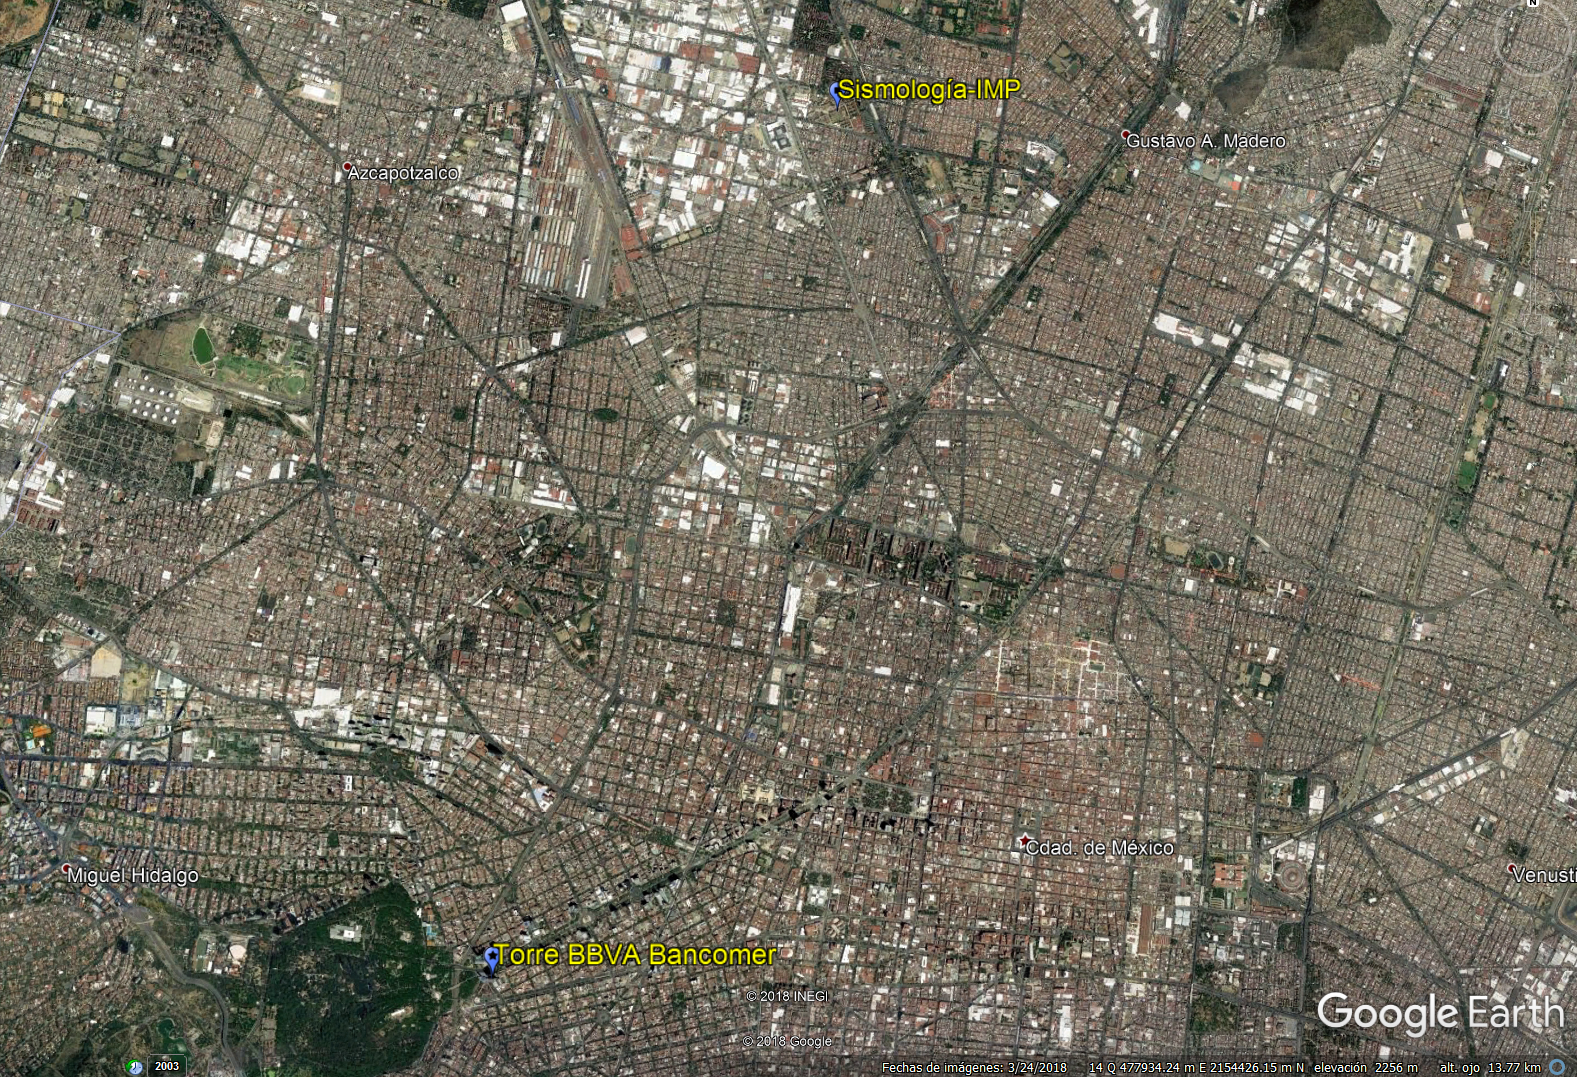

In [1]:
from IPython.display import Image
Image(filename="torre_bbva_imp.png")

**Figura 1.** Mapa. Ubicación de los Puntos A (Torre BBVA Bancomer) y B (Sismología-IMP).

In [2]:
import utm
import numpy as np

### Convertir de coordenadas geográficas a coordendas UTM-WGS84

In [3]:
#Coordendas geográficas en decimales
pa = (19.4228,-99.1749) #Coordenadas Torre BBVA Bancomer 
pb = (19.4893,-99.1478) #Coordenadas Edificio Sismología de Exploración del Instituto Mexicano del Petróleo

In [4]:
#Coordenadas UTM-WGS84
A = utm.from_latlon(pa[0],pa[1])
B = utm.from_latlon(pb[0],pb[1])

In [5]:
print('Punto A (UTM-WGS84) = ', np.round(A[0],4), np.round(A[1],4), '[m]')
print('Punto B (UTM-WGS84) = ', np.round(B[0],4), np.round(B[1],4), '[m]')

Punto A (UTM-WGS84) =  481638.7633 2147619.7327 [m]
Punto B (UTM-WGS84) =  484490.0856 2154975.5319 [m]


### Cálculo de la distancia entre los puntos A y B

In [6]:
AB = np.sqrt(np.power((B[0]-A[0]),2)+np.power((B[1]-A[1]),2))

In [7]:
print('Distancia AB [centímetros] = ', np.round(AB,4)*100, '[cm]')
print('Distancia AB [metros] = ', np.round(AB,4), '[m]')
print('Distancia AB [kilómetros] = ', np.round(AB,4)/1000, '[km]')

Distancia AB [centímetros] =  788909.51 [cm]
Distancia AB [metros] =  7889.0951 [m]
Distancia AB [kilómetros] =  7.8890951 [km]


### Tiempo de viaje entre los puntos A y B

In [8]:
fac_conv = (10/36) #Factor de conversión de km/h a m/s

In [9]:
print('Factor de conversión =',fac_conv, '[m/s]')

Factor de conversión = 0.2777777777777778 [m/s]


In [10]:
velp_mxs = fac_conv * 2 #Velocidad en metros por segundo del peatón
vela_mxs = fac_conv * 60 #Velocidad en metros por segundo del automóvil

#### Velocidad del peatón y automóvil en km/h y m/s

In [11]:
print('Velocidad peatón en km/h = ', 2, '[km/h]')
print('Velocidad peatón en m/s = ', velp_mxs, '[m/s]')
print('Velocidad automóvil en km/h = ', 60, '[km/h]')
print('Velocidad automóvil en m/s = ', vela_mxs, '[m/s]')

Velocidad peatón en km/h =  2 [km/h]
Velocidad peatón en m/s =  0.5555555555555556 [m/s]
Velocidad automóvil en km/h =  60 [km/h]
Velocidad automóvil en m/s =  16.666666666666668 [m/s]


In [12]:
tiempo_peaton = np.round(AB,4)/velp_mxs
tiempo_auto = np.round(AB,4)/vela_mxs

#### Tiempo de viaje del peatón y automóvil en segundos, minutos y horas

In [13]:
#Tiempo de viaje del peatón
print('Tiempo peatón [segundos] = ', np.round(tiempo_peaton,4), '[s]')
print('Tiempo peatón [minutos] = ', np.round(tiempo_peaton/60,4), '[min]')
print('Tiempo peatón [horas] = ', np.round((tiempo_peaton/60)/60,4), '[horas]')
#Tiempo de viaje del automóvil
print('Tiempo automóvil [segundos] = ', np.round(tiempo_auto,4), '[s]')
print('Tiempo automóvil [minutos] = ', np.round(tiempo_auto/60,4), '[min]')
print('Tiempo automóvil [horas] = ', np.round((tiempo_auto/60)/60,4), '[horas]')

Tiempo peatón [segundos] =  14200.3712 [s]
Tiempo peatón [minutos] =  236.6729 [min]
Tiempo peatón [horas] =  3.9445 [horas]
Tiempo automóvil [segundos] =  473.3457 [s]
Tiempo automóvil [minutos] =  7.8891 [min]
Tiempo automóvil [horas] =  0.1315 [horas]
